# Applicazioni del teorema di Bayes

Ricordiamo l'enunciato del teorema di Bayes, introdotto durante la lezione sui dati del Titanic, che a validità generale per ogni approccio finora considerato alla probabilità:

$\displaystyle P(A|B) = \frac{P(B|A) P(A)}{P(B)}$

Il teorema ci permette di determinare $P(A|B)$, la probabilità di un evento $A$ dato l'evento $B$, e può essere interpretato come segue:

1. se non sappiamo se l'evento $B$ sia vero o falso, la probabilità di $A$ è data da $P(A)$.
1. se sappiamo che $B$ è vero, la probabilità di $A$ si modifica e divente $P(A|B)$
1. se conosciamo $P(B|A)$, il teorema di Bayes ci consente di *invertire* $A$ e $B$ e calcolare $P(A|B)$ in termini di $P(B|A)$
1. in sostanza, la probabilità di $A$ viene modificata e $P(A)$ va moltiplicata per un fattore pari a $P(B|A)/P(B)$ per tenere conto del fatto che sappiamo che $B$ è vero

In pratica, possiamo considerara $B$ come un'osservazione di un fatto, o di un dato sperientale.

L'osservazione di $B$ fa sì che la probabilità di $A$ vada modificata: $P(A) \rightarrow P(A|B)$, e va modificata con un fattore moltiplicativo dato da $P(B|A)/P(B)$.

Un modo per visualizzare graficamente il teorema di Bayes è dovuto a Bob Cousins, ed è riportata nel seguito.

**Definizione grafica dei diversi elementi:**

<img style="width: 300px" src="img/bayes_cousins.png">

**La dimostrazione del teorema di Bayes deriva dall'eguaglianza di:**

<img style="width: 500px" src="img/bayes_cousins_2.png">

# Monty hall

Si tratta di un classico gioco discusso in diverse <a href="https://www.thedifferentgroup.com/2020/04/26/paradosso-di-monty-hall/">pagine in rete</a>, proposto in un programma televisivo americano che evidenzia aspetti controintuitivi della teoria delle probabilità.

Il gioco consiste in questo:
* ci sono tre porte 
* dietro una sola delle tre porte c'è un'automobile, che è il premio per chi indovina la porta giusta
* dietro le altre due porte ci sono due capre (che il giocatore non potrà portare a casa)

Il giocatore deve scegliere una porta e cercare di portare a casa il premio.

<img style="width: 500px" src="img/monty-hall.png">
<span style="color: gray;">Immagine di publico dominio</span>

Inizialmente il giocatore sceglie una delle tre porte. A questo punto, nelle due rimanenti ci saranno o due capre o una capra ed una automobile.

Quindi, il conduttore apre una delle due porte dietro la quale c'è una capra (il conduttore sa cosa c'è dietro le tre porte!).

Al giocatore viene quindi data l'opportunità di cambiare la porta che ha scelto con la terza rimanente.

**Cosa conviene fare al giocatore? Tenere la prima scelta, o cambiare?**

## Simulazione

Proviamo una soluzione di forza bruta. Costruiamoci una piccola simulazione dove scegliamo se un giocatore tiene o cambia la porta che ha scelto.

<span style="color: blue">Inseriamo un'opzione ```verbose``` per testare la funzione prima di usarla massicciamente.</span>

*Lo scopo è di avere un metodo per risolvere un problema generico. Ma in questo caso si potrebbe semplicemente usare la probabilità classica e contare tutti casi....!*

In [1]:
import random

def monty_hall(change, verbose = False):
    doors = ['goat', 'goat', 'goat']
    car_idx = random.randint(0, 2)
    doors[car_idx]='car'
    if verbose: print(doors)
    pick_idx = random.randint(0, 2)
    if verbose: print("pick:", pick_idx, '(', doors[pick_idx],')')
    no_pick_idx = list(set([0, 1, 2]) - set([pick_idx]))
    if verbose: print("no pick:", no_pick_idx, '(', doors[no_pick_idx[0]], ',', doors[no_pick_idx[1]], ')')
    if doors[no_pick_idx[0]]=='car':
        open_idx = no_pick_idx[1]
        choose_idx = no_pick_idx[0]
        if verbose: print('car:', no_pick_idx[0], "-> will open ", open_idx)
    elif doors[no_pick_idx[1]]=='car':
        open_idx = no_pick_idx[0]
        choose_idx = no_pick_idx[1]
        if verbose: print('car: ', no_pick_idx[1], "-> will open ", open_idx)
    else:
        which_idx = random.randint(0, 1)
        open_idx = no_pick_idx[which_idx]
        choose_idx = no_pick_idx[1-which_idx]
        if verbose: print("no car, -> will open (randomly)", open_idx)
    if verbose: print("open:", open_idx, "(", doors[open_idx], ")")
    if change:
        if verbose: print("change: ", pick_idx, "->", choose_idx, "(", doors[choose_idx], ")")
        pick_idx = choose_idx
    else:
        if verbose: print("keep: ", pick_idx, "(", doors[pick_idx], ")")
    return doors[pick_idx] == 'car'

In [11]:
# Testiamo che tutto funzioni in modalità verbosa
monty_hall(change=True, verbose=True)

['car', 'goat', 'goat']
pick: 1 ( goat )
no pick: [0, 2] ( car , goat )
car: 0 -> will open  2
open: 2 ( goat )
change:  1 -> 0 ( car )


True

Giriamo la simulazione un numero grande di volte, vediamo quanto spesso si vince con le due strategie:

In [12]:
resutls_no_change = { True: 0, False: 0 }
n_mc = 100000
for i in range(n_mc):
    resutls_no_change[monty_hall(False)] += 1
print("no change:", resutls_no_change, "{:.2%}".format(resutls_no_change[True]/n_mc))

resutls_change = { True: 0, False: 0 }
for i in range(n_mc):
    resutls_change[monty_hall(True)]+=1
print("change:", resutls_change, "{:.2%}".format(resutls_change[True]/n_mc))

no change: {True: 33286, False: 66714} 33.29%
change: {True: 66598, False: 33402} 66.60%


# Dimostrazione

Con una simulazione abbiamo dimostrato, senza capire però bene perché, che **convine cambiare**.

<span style="color: blue">Perché?</span>

La motivazione si può capire in due modi:
1. ancora di forza bruta, enumerando tutte le possibilità. Tedioso, ma possibile. È un'applicazione della probabilità classica.
1. usando il teorema di Bayes.

## Se il conduttore non apre alcuna porta

Se il conduttore non apre alcuna porta, la probabilità di vincere è semplicemente $1/3$: senza avere informazioni su cosa c'è dietro le porte, ogni porta ha uguale probabilità, pari ad $1/3$.

**Immaginiamo di aver scelto la porta $1$** (se scegliessimo $2$ o $3$ il ragionamento sarebbe lo stesso):

$P(\mathrm{car} = 1) = P(\mathrm{car} = 2) = P(\mathrm{car} = 3) = 1/3$

## Se il conduttore apre una porta con una capra

Se il conduttore invece apre una porta, e questo evento lo chiamiamo $E$, invece, ricordiamo che:

$\displaystyle P(A|E) = \frac{P(E|A) P(A)}{P(E)}$

L'evento $A$ che ci interessa può essere che il premio sia nella porta che abbiamo scelto (la n. $1$) oppure in un'altra.

**Immaginiamo che il conduttore scelga la porta $3$** (il ragionamento sarebbe stato lo stesso se avesse scelto la $2$)

L'evento $E=\mathrm{aperta}\,3$ rappresenta un'**informazione nuova di cui abbiamo conoscenza**.

Ad esempio, siamo sicuri che dietro porta scelta dal conduttore (es.: la n. $3$) non c'è l'auto.

Dobbiamo quindi calcolare:

$P(\mathrm{car} = 1| \mathrm{aperta}\, 3)$

<span style="color: red">Si potrebbe pensare intuitivamente che, visto che l'auto non è in $3$, la probabilità che l'auto sia in $1$ o in $2$ sia la stessa, quindi che $P(\mathrm{car} = 1)=1/2$ perché restano due possibilità. Ma non è così.</span>

Infatti, usando il teorema di Bayes:

$\displaystyle P(\mathrm{car} = 1|  \mathrm{aperta}\, 3) = \frac{P(\mathrm{aperta}\, 3|\mathrm{car} = 1) P(\mathrm{car} = 1)}{P(\mathrm{aperta}\, 3)}$

Calcoliamo i diversi contributi:
* $P(\mathrm{aperta}\, 3|\mathrm{car} = 1)$ è la probabilità che il conduttore apra la porta $3$ se l'auto è nella $1$. Quindi questa probabilità vale $1/2$, perché può scegliere a caso $2$ o $3$, che entrambe avranno una capra.
* $P(\mathrm{car} = 1)$, questa è la probabilità che abbiamo già riportato sopra, e vale $1/3$
* $P(\mathrm{aperta}\, 3)$ non è altrettanto ovvia da valutare. Vedremo che questa difficoltà di valutare il denominatore è una costante nell'applicazione del teorema di Bayes. Considerando che $1$ è stata già scelta dal giocatore, il conduttore può aprire o $2$ o $3$, e in alcuni casi non ha scelta perché non deve mostrare l'auto:
    * se l'auto è in $1$ (prob. $1/3$): $2$ o $3$ sono aperte con probabilità $1/2$
    * se l'auto è in $2$ (prob. $1/3$): la probabilità di aprire $3$ è $1$ (deve aprire per forza quella)
    * se l'auto è in $3$ (prob. $1/3$): la probabilità di aprire $3$ è $0$ (mostrerebbe l'auto)

In totale:

$\displaystyle  P(\mathrm{aperta}\, 3) = \frac{1}{3}\cdot \frac{1}{2} + \frac{1}{3}\cdot 1 + \frac{1}{3}\cdot 0
=\frac{1}{6}+\frac{1}{3}+0
= \frac{3}{6}
= \frac{1}{2}$

Alla fine potevamo anche arrivarci in altro modo: una volta che il giocatore ha scelto $1$, restano due possibilità al conduttore, quindi aprire $2$ o $3$, per simmetria, corrisponderà per entrambe alla probabilità $1/2$.

Quindi:

$\displaystyle P(\mathrm{car} = 1| \mathrm{aperta}\, 3) = 
\frac{\frac{1}{2} \cdot \frac{1}{3}}{\frac{1}{2}} 
= \frac{1}{3}$

Non c'è da sorprendersi perché la probabilità di avere scelto il premio non cambia se viene aperta una porta che non c'entra niente con la nostra scelta.

Ma quindi, avendo solo due possibilità rimaste ($1$ o $2$, perché la $3$ è stata aperta dal conduttore), la probabilità che il premio sia nella porta $2$ (che potrei scegliere al posto della $1$) vale:

$\displaystyle P(\mathrm{car} = 2| \mathrm{aperta}\, 3) = 1 -P(\mathrm{car} = 1| \mathrm{aperta}\, 3) = 1-\frac{1}{3} = \frac{2}{3}$

Possiamo anche calcolare $P(\mathrm{car} =2 1| \mathrm{aperta}\, 3)$ usando ancora il teorema di Bayes:

$\displaystyle P(\mathrm{car} =2| \mathrm{aperta}\, 3) = \frac{P(\mathrm{aperta}\, 3|\mathrm{car} = 2) P(\mathrm{car} =2)}{P(\mathrm{aperta}\, 3)}$

Abbiamo:
* $P(\mathrm{aperta}\, 3|\mathrm{car} = 2)$ questa volta vale $1$ (se l'auto è un $2$ non resta altra scelta che aprire la $3$)
* $P(\mathrm{car} = 2)=1/3$
* $P(\mathrm{aperta}\, 3)=1/2$, lo abbiamo calcolato sopra.

E quindi:

$\displaystyle P(\mathrm{car} = 2| \mathrm{aperta}\, 3)  = 
\frac{1 \cdot \frac{1}{3}}{\frac{1}{2}} 
= \frac{2}{3}$

Consistentemente:

$\displaystyle P(\mathrm{car} = 3| \mathrm{aperta}\, 3) = \frac{P(\mathrm{aperta}\, 3|\mathrm{car} = 3) P(\mathrm{car} =2)}{P(\mathrm{aperta}\, 3)} = 0$

perché $P(\mathrm{aperta}\, 3|\mathrm{car} = 3)=0$ (è impossibile aprire una porta dove c'è l'auto).

### Commento: teorema di Bayes e informazione

<span style="color:blue">L'auto non si è mai spostata durante il gioco.</span> Però l'**informazione** che l'auto non è nella porta $3$ ha cambiato la probabilità che l'auto fosse nella porta $2$ portandola da $1/3$ a $2/3$, rendendo più conveniente cambiare la scelta.

Questo dimostra che, più che la configurazione statica di un sistema che produce risultati casuali, **quello che più importa è cosa conosciamo e cosa non conosciamo**.

In sostanza, il teorema di Bayes ci dà un modo per **cambiare la nostra consocenza sulle cose**:

* prima dell'evento $E$ che corrisponde all'apertura della porta $3$, la probabilità di un evento era $P(A)$
* dopo l'evento $E$ dobbiamo aggiornare la probabilità di $A$ che diventa $P(A|E)$

Il teorema di Bayes ci dice come aggiornare la nostra conoscenza da $P(A)$ a $P(A|E)$ tramite la formula:

$\displaystyle P(A|E) = \frac{P(E|A) P(A)}{P(E)}$

$P(A)$ viene aggiornata con un fattore moltiplicativo:

$\displaystyle P(A|E) = P(A) \frac{P(E|A)}{P(E)}$

I termini che compaiono assumono così un nuovo significato:

* $P(A)$ è la **probabilità a priori** (*prior probability* in inglese)
* $E$ rappresenta l'**evidenza**. Per i fisici, l'osservazione sperimentale
* $P(A|E)$ rappresenta la **probabilità a posteriori** (*posterior probability* in inglese)
* $P(E|A)$ viene definita **verosimiglianza** dell'evento $E$ dato l'evento $A$. Nel seguito vedremo che ha un ruolo importante.

# Un'applicazione epidemiologica

Immaginiamo che una persona faccia un test per diagnosticare una malattia seria, ma rara.

Immaginiamo che la probabilità di avere una diagnosi positiva corretta su una persona malata sia vicina al 100%, ma che ci sia anche una piccola probabilità di avere una diagnosi positiva su una persona sana (**falso positivo**).

Useremo i seguenti simboli per brevità:
* $\dagger$: persona malata, $\heartsuit$: persona sana
* $+$: test positivo, $-$: test negativo

Immaginiamo ad esempio di avere i seguenti valori numerici:

* $P(+|\dagger) \simeq 100\%$
* $P(-|\dagger) \simeq 0\%$
* $P(+|\heartsuit) = 0.2\%$
* $P(-|\heartsuit) = 99.8\%$

**<span style="color: red">Se una persona ha ricevuto una diagnosi positiva ($+$), qual è la probabilità che sia realmente malata ($\dagger$)?</span>**

Molte persone risponderanno, intuitivamente, ma **sbagliando**, che:

$P(\dagger|+) = 1-P(+|\heartsuit) = 99.8\%$

In realtà, applicando il teorema di Bayes, otteniamo che:

$\displaystyle P(\dagger|+) = \frac{P(+|\dagger) P(\dagger)}{P(+)}\simeq \frac{P(\dagger)}{P(+)}$

Ci servono altri ingredienti, in particolare $P(\dagger)$, ossia la probabilità che una persona scelta a caso tra la popolazione sia malata. Questo ingrediente non era tra i dati che abbiamo finora considerato, ma è molto importante!

### Visualizzazione del problema

Nei grafici che segue, come nell'esempio del Titanic, ad aree uguali corrispondono numeri di casi uguali.

n. ill / healthy:  15 / 985


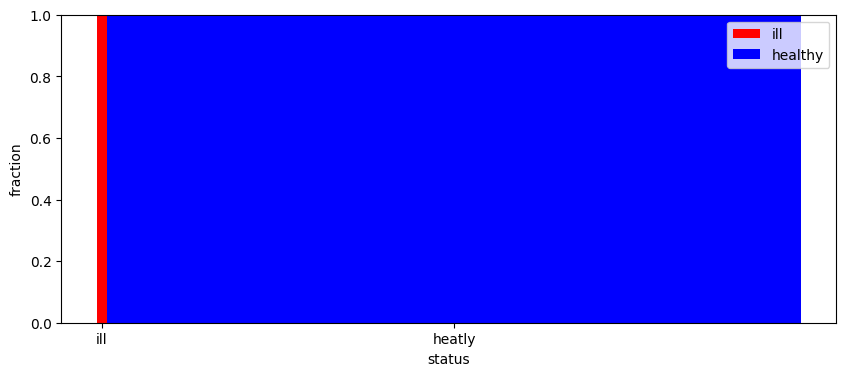

In [14]:
import matplotlib.pyplot as plt
# consideriamo una frazione di malati sul totale < del 2%
c_ill, c_healthy = 15, 985 
c_all = c_ill + c_healthy
plt.figure(figsize=(10, 4))
width=(c_ill, c_healthy)
pos=(0, (c_ill+c_healthy)/2)
print("n. ill / healthy: ",c_ill, "/", c_healthy)
plt.bar(x=pos, height=[1,0], width=width, label='ill', color='red')
plt.bar(x=pos, bottom=[1,0], height=[0,1], width=width, label='healthy', color='blue')
plt.xticks(pos, ['ill','heatly'])
plt.legend(loc='upper right')
plt.xlabel('status')
plt.ylabel('fraction')
plt.show()

Solo per motivi grafici, usuamo $P(+|\heartsuit) = 2\%$ anziché $P(+|\heartsuit) = 0.2\%$, altrimenti nel grafico sarebbe invisibile.


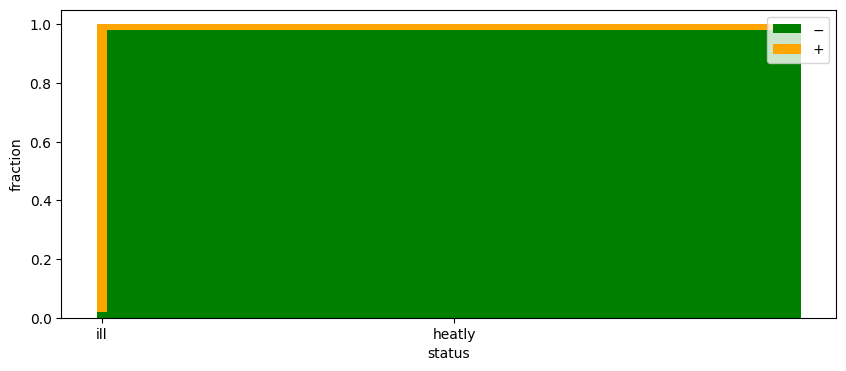

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
p_1_ill, p_1_healthy = (0.98, 0.02) # usiamo la notazione: 1 <-> + per i nomi delle variabili
p_0_ill, p_0_healthy = (0.02, 0.98) # usiamo la notazione: 0 <-> - per i nomi delle variabili
plt.bar(x=pos, height=(p_0_ill, p_0_healthy), width=width, label='$-$', color='green')
plt.bar(x=pos, bottom=(p_0_ill, p_0_healthy), height=(p_1_ill, p_1_healthy), width=width, label='$+$', color='orange')
plt.xticks(pos, ['ill','heatly'])
plt.legend(loc='upper right')
plt.xlabel('status')
plt.ylabel('fraction')
plt.show()

Calcoliamo quanto vale $P(+)$, che ci serve al denominatore nella formula di Bayes.

In [21]:
c_1 = p_1_ill*c_ill + p_1_healthy*c_healthy
c_0 = p_0_ill*c_ill + p_0_healthy*c_healthy
p_1 = c_1/(c_0 + c_1) # c_0 + c_1 = 1000
print('P(+) = {:.2%}'.format(p_1))

P(+) = 3.44%


Vale la seguente scomposizione, che poi potremo generalizzare in seguito:

$P(+) = P(+|\dagger) P(\dagger) + P(+|\heartsuit) P(\heartsuit) \simeq P(\dagger) + P(+|\heartsuit)P(\heartsuit) \simeq P(\dagger) + P(+|\heartsuit)$

perché $P(+|\dagger) \simeq 1$ e $P(\heartsuit) \simeq 1$.

Per completare la formula di Bayes:

In [22]:
p_ill = c_ill/c_all
p_ill_1 = p_1_ill*p_ill/p_1
print('P(+|ill) = {:.2%}'.format(p_1_ill))
print('P(ill) = {:.2%}'.format(p_ill))
print('P(ill|+) = {:.2%}'.format(p_ill_1))

P(+|ill) = 98.00%
P(ill) = 1.50%
P(ill|+) = 42.73%


Considerando che $P(+|\dagger)\simeq 1$, risulta che:

$\displaystyle P(\dagger|+) \simeq \frac{P(\dagger)}{P(+)} \simeq \frac{P(\dagger)}{P(\dagger) + P(+|\heartsuit)} =
\frac{1}{1+P(+|\heartsuit)/P(\dagger)}
$

Se abbiamo quindi che, se la frazione di malati $P(\dagger)$ è minore della frazione di falsi positivi $P(+|\dagger)$, la probabilità di essere realmente malati con un test positivo $P(\dagger|+)$ è minore del 50\%!

Per questo alcune diagnosi mediche che hanno una probabilità di falso positivo non trascurabile e darebbero luogo a cure con importanti controindicazioni non sono sempre consigliabili. La mammografia con conseguente chemioterapia in caso di diagnosi positiva di cancro è sconsigliata sotto i 50 anni.

# Riassumendo

Il teorema di Bayes ci dice come *aggiornare* il valore della probabilità che assegnamo ad un evento $A$, che ha il ruolo di *ipotesi*, dopo che abbiamo avuto l'evidenza $E$:

$\displaystyle P(A|E) = \frac{P(E|A) P(A)}{P(E)}$

* $P(A)$ è la **probabilità a priori** (*prior probability* in inglese)
* $P(E)$ è detta **probabilità marginale** o **evidenza**.
* $P(A|E)$ rappresenta la **probabilità a posteriori** (*posterior probability* in inglese)
* $P(E|A)$ viene definita **verosimiglianza** dell'evento $E$ dato l'evento $A$.

# Legge della probabilità totale

Immaginiamo di avere una partizione dello spazio degli eventi $\Omega$, ossia un certo numero di eventi (ossia insiemi) $A_i,\cdots,A_n$ tali che $A_i\cap A_j = \emptyset$ per ogni $i\ne j$ e che $\displaystyle \bigcup_{i=1}^n A_i = \Omega$.

Un evento $E$ si può a sua volta partizionare in tanti insiemi $E_i=E\cap A_i$. Infatti, risulterà $E_i\cap E_j = E\cap A_i \cap A_j = E\cap\emptyset=\emptyset$. Inoltre:

$\displaystyle \bigcup_{i=1}^n E_i = \bigcup_{i=1}^n E\cap A_i = E\cap\left(\bigcup_{i=1}^n A_i\right) = E\cap\Omega = E$.

La costruzione degli insiemi $E_i$ è visivamente riportata nelle figure che seguono.

<img style="width: 300px" src="img/total-prob-2.png"> 

<img style="width: 300px" src="img/total-prob.png">

Passando dagli insiemi alle probabilità, otteniamo:

$P(E_i) = P(E\cap A_i)$

Dalla definizione di probabilità condizionata, $P(A|B) = P(A\cap B)/P(B)$, abbiamo:

$P(E_i) = P(E\cap A_i) = P(E|A_i)P(A_i)$

Siccome:

$\displaystyle P(E) = \sum_{i=1}^n P(E_i)$

Abbiamo la seguente legge di scomposizione della probabilità totale:

$\displaystyle P(E) = \sum_{i=1}^n P(E|A_i)P(A_i)$

### Il denominatore nella formula di Bayes

Torniamo alla formulazione del teorema di Bayes:

$\displaystyle P(A|E) = \frac{P(E|A) P(A)}{P(E)}$

Il denominatore possiamo scomporlo, secondo la legge della probabilità totale, in:

$\displaystyle P(E) = \sum_{i=1}^n P(E|A_i) P(A_i)$

Questa scomposizione l'abbiamo già vista nell'esempio epidemiologico di cui sopra.

Quindi, per ciascuno degli $A_i$, possiamo scrivere:

$\displaystyle P(A_i|E) = \frac{P(E|A_i) P(A_i)}{\sum_{j=1}^n P(E|A_j) P(A_j)}$

È così evidente che il denominatore nella formula di Bayes appare come fattore di normalizzazione. Possiamo quindi riscrivere:

$\displaystyle P(A_i|E) = P(A_i)\,\alpha_i$

dove i termini $\alpha_i$ si ottengono dai termini $P(E|A_i)$ normalizzandoli in modo che la loro somma sia uguale ad uno:

$\displaystyle \alpha_i = \frac{P(E|A_i) }{\sum_{i=j}^n P(E|A_j) P(A_j)}$

# Odds *vs* probabilità e fattori di Bayes

Il teorema di Bayes si può scrivere in un modo più diretto utilizzando, invece delle probabilità, gli *odds*.

In pratica, invece di quantificare, come probabilità, il rapporto tra il numero di casi favorevoli e quelli sfavorevoli:

$\displaystyle p = \frac{n}{N}$

si esprime il rapport tra il numero di casi favorevoli e quelli sfavorevoli. In genere, specialmente nel gergo delle scommesse, si preferisce usare ":" anzichè la frazione:

$\displaystyle o = n : N-n$

Matematicamente, si può scrivere:

$\displaystyle o = \frac{n}{N-n} = \frac{p}{1-p}$

Se sono possibili solo due casi, $A$ e il suo complemento $\overline{A}$, che hanno probabilita, rispettivamente, $P(A)$ e $P(\overline{A})=1-P(A)$, possiamo scrivere:

$\displaystyle P(A|E) = \frac{P(E|A) P(A)}{P(E)}$

$\displaystyle P(\overline{A}|E) = \frac{P(E|\overline{A}) P(\overline{A})}{P(E)}$

Facendo il rapporto di $P(A|E)$ e $P(\overline{A}|E)$, il denominatore $P(E)$ sparisce, semplificando la formula:

$\displaystyle \frac{P(A|E)}{P(\overline{A}|E)} = \frac{P(E|A) P(A)}{P(E|\overline{A}) P(\overline{A})}$

In termini degli *odds* possiamo semplicemente scrivere:

$\displaystyle O(A|E) = O(A)\frac{P(E|A)}{P(E|\overline{A})}$

Questo rende semplice ed immediato applicare l'aggiornamento probabilità a priori a seguito dell'evidenza $E$, semplicemente moltiplicando gli odds a priori per il fattore di Bayes per ottenere gli odds a posteriori.

Il termine della frazione a destra viene chiamato **fattore di Bayes**.

Anche se non abbiamo solo due casi, $A$ e $\overline{A}$, ma due casi, $A_i$ e $A_j$ tra tanti possibili casi $A_1,\cdots, A_n$, possiamo usare la relazione sopra per il rapporto tra qualsiasi coppia di probabilità. Anche in questo caso, non è necessario calcolare $P(E)$:

$\displaystyle \frac{P(A_i|E)}{P({A_j}|E)} = \frac{P(A_i)}{P(A_j)}\frac{P(E|A_i)}{P(E|A_j)}$

## Approfondimenti

* Video: [Bayes theorem](https://youtu.be/HZGCoVF3YvM) (15'45")
* Vide: [The quick proof of Bayes theorem](https://youtu.be/U_85TaXbeIo) (3'47")
* Video: [The Bayesian trap](https://youtu.be/R13BD8qKeTg) (10'36")
* Video: [Why Bayes rule is nicer with odds](https://youtu.be/lG4VkPoG3ko) (21'13") con un'introduzione dei **fattori di Bayes**
* [How to create a spam filter using Bayes’ theorem?](https://medium.com/swlh/how-to-create-a-spam-filter-using-bayes-theorem-f3811f213046)
* [Bayes Theorem in Machine Learning: Introduction, How to Apply & Example](https://www.upgrad.com/blog/bayes-theorem-in-machine-learning/)

# Spunti per esercizi

* In Italia si è stimato che il 22% della popolazione fuma. Ogni anno 377.000 nuovi tumori sono diagnosticati su 59.6 milioni di abitanti, tra cui 40.882 tumori al polmone, l'85% dei quali si stima è causata dal fumo. Calcolare la probabilità che in un anno un fumatore abbia un tumore al polmone.

In [27]:
p_fumatore = 0.22
p_tumore = 40882 / 59.6e6
p_fumatore_tumore = 0.85
p_tumore_fumatore = p_fumatore_tumore * p_tumore / p_fumatore
print("prob. tumore: {:.4%}".format(p_tumore))
print("prob. tumore - fumatore: {:.4%}".format(p_tumore_fumatore))
print("prob. tumore - fumatore/prob. tumore: {:.2f}".format(p_tumore_fumatore/p_tumore))


prob. tumore: 0.0686%
prob. tumore - fumatore: 0.2650%
prob. tumore - fumatore/prob. tumore: 3.86


* In un paese del nord Europa, il 65% delle ragazze ha i capelli biondi, il 25% hai i capelli rossi, il 10% neri. Inoltre, ha gli occhi scuri l'8% delle ragazze bionde, il 22% delle rosse, il 60% delle more. Una ragazza ha i capelli coperti da un foulard, e si vede che ha gli occhi scuri. Qual è la probabilità che sia bionda?

* $P(bionda) = 65\%$
* $P(rossa) = 25\%$
* $P(mora) = 10\%$
* $P(scuri|bionda) = 8\%$
* $P(scuri|rossa) = 22\%$
* $P(scuri|mora) = 60\%$

$\displaystyle P(bionda|scuri) = \frac{P(scuri|bionda) P(bionda)}{P(scuri)}$

$P(scuri) = P(scuri|bionda)P(bionda) + P(scuri|rossa)P(rossa) + P(scuri|mora)P(mora)$

In [28]:
p_bionda = 0.65
p_rossa = 0.25
p_mora = 0.10
p_scuri_bionda = 0.08
p_scuri_rossa = 0.22
p_scuri_mora = 0.60
p_scuri = p_scuri_bionda*p_bionda + p_scuri_rossa*p_rossa + p_scuri_mora*p_mora  
p_bionda_scuri = p_scuri_bionda * p_bionda / p_scuri
p_rossa_scuri = p_scuri_rossa * p_rossa / p_scuri
p_mora_scuri = p_scuri_mora * p_mora / p_scuri
print("prob. occhi scuri: {:.2%}".format(p_scuri))
print("prob. bionda: {:.2%}".format(p_bionda_scuri))
print("prob. rossa: {:.2%}".format(p_rossa_scuri))
print("prob. mora: {:.2%}".format(p_mora_scuri))

prob. occhi scuri: 16.70%
prob. bionda: 31.14%
prob. rossa: 32.93%
prob. mora: 35.93%


* Un fascio di protoni colpisce un bersaglio e produce un campione di particelle che contiene l'8% di muoni, il 10% di kaoni e il rimanente 82% di pioni. Un rivelatore che identifica le particelle riesce ad identificare correttamente come muoni il 95% dei muoni ed una frazione del 7% dei kaoni e del 4% dei pioni. Calcolare la frazione attesa di muoni nel campione di particelle identificate come tali dal rivelatore.

In [29]:
p_muone = 0.08
p_kaone = 0.1
p_pione = 0.82
p_rmuone_muone = 0.95
p_rmuone_kaone = 0.07
p_rmuone_pione = 0.04
p_rmuone = p_kaone*p_rmuone_kaone + p_pione*p_rmuone_pione + p_muone*p_rmuone_muone
p_muone_rmuone = (p_rmuone_muone * p_muone)/p_rmuone
p_kaone_rmuone = (p_rmuone_kaone * p_kaone)/p_rmuone
p_pione_rmuone = (p_rmuone_pione * p_pione)/p_rmuone
print("p. id: {:.2%}".format(p_rmuone))
print("fraz. muoni: {:.2%}".format(p_muone_rmuone))
print("fraz. kaoni: {:.2%}".format(p_kaone_rmuone))
print("fraz. pioni: {:.2%}".format(p_pione_rmuone))

p. id: 11.58%
fraz. muoni: 65.63%
fraz. kaoni: 6.04%
fraz. pioni: 28.32%


In fisica la terminologia usata non è quella usualmente usata in statistica. Parleremo quindi di:
* **efficienza** di identificazione dei muoni
* ***mis*-identificazione** di pioni e kaoni (abusando dall'inglese: *misidentification*; in italiano "misidentificazione" ha anche un significato in psicologia) è la probabilità di un *falso positivo*
* **purezza** del campione $=$ frazione del campione correttamente identificata
* **contaminazione** del campione $=$ frazione del campione identificata in maniera errata (falsi positivi)

* Estendere il problema del monty hall al caso con 4 o più porte.

Dare anche uno sguardo ad alcuni esercizi in rete: [<a href="http://gtribello.github.io/mathNET/bayes-theorem-problems.html">1</a>], [<a href="https://courses.lumenlearning.com/sanjacinto-finitemath1/chapter/5-5-5-6-exercises-conditional-probability-and-bayes-formula/">2</a>].